In [2]:
from lib.ekyn import *
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [3]:
idx = get_ekyn_ids()
# train_idx,test_idx = train_test_split(get_ekyn_ids(),test_size=.25,random_state=0)
train_idx = get_ekyn_ids()
test_idx = [train_idx[12]]
train_idx.remove(test_idx[0])
print(train_idx,test_idx)
print(len(train_idx),len(test_idx))

['A1-0', 'A1-1', 'A4-0', 'B1-0', 'B3-1', 'C1-0', 'C4-0', 'C4-1', 'D1-0', 'E1-0', 'E2-1', 'E4-0', 'F1-0', 'F1-1', 'F5-1'] ['E4-1']
15 1


In [ ]:
df = pd.DataFrame()

for id in idx:
    for condition in ['Vehicle','PF']:
        X,y = load_ekyn_pt(idx=id,condition=condition)
        df[f'{id}_{condition}'] = torch.bincount(y.argmax(axis=1))/len(y)

In [ ]:
df = df.T

In [ ]:
plt.figure(figsize=(7.2,7.2),dpi=200)
sns.boxplot(data=df)

In [ ]:
s = df.describe()[1]
w = df.describe()[2]
iqr_s = s['75%'] - s['25%']
iqr_w = w['75%'] - w['25%']
lower_outlier_s = s['25%'] - (1.5*iqr_s)
upper_outlier_w = w['75%'] + (1.5*iqr_w)
lower_outlier_s

In [ ]:
df[(df[1] < lower_outlier_s) | (df[2] > upper_outlier_w)]

In [6]:
from mne.io import read_raw_edf

eeg = torch.from_numpy(read_raw_edf(f'./24-AGING-2.edf').get_data(picks=['EEG 1'])[0]).float().reshape(-1,5000)

Extracting EDF parameters from /home/andrew/sleep/sleep_ml/24-AGING-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


(0.0, 0.0002)

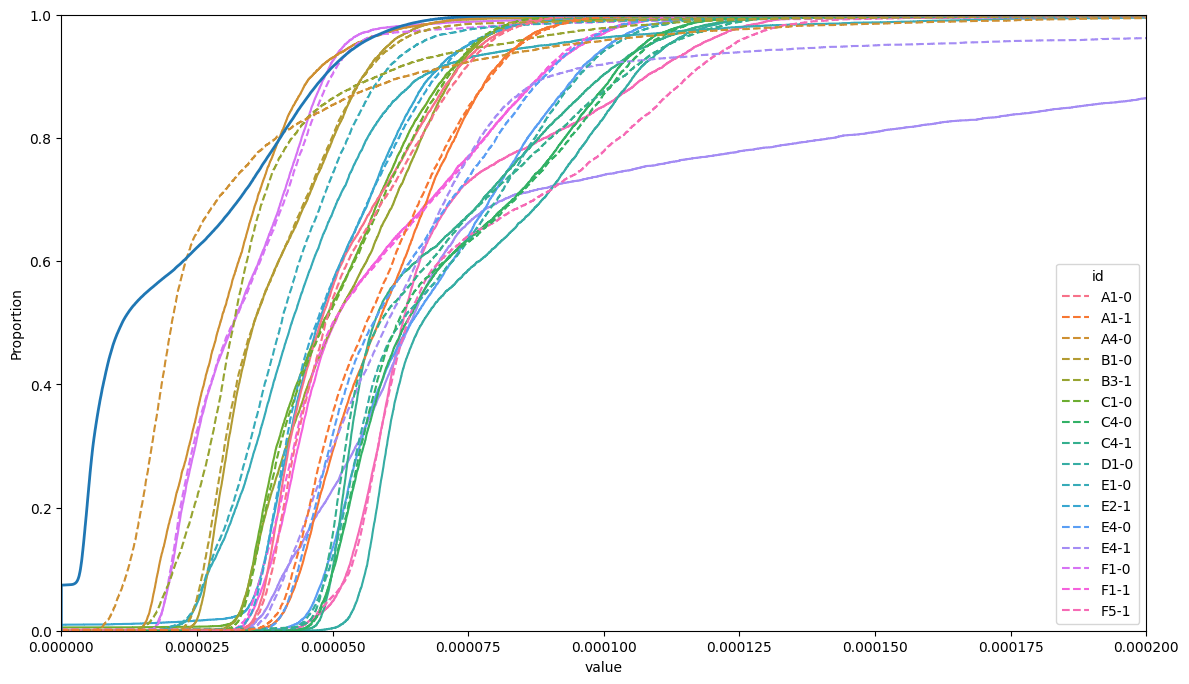

In [7]:
df = pd.DataFrame()

plt.figure(figsize=(14,8))
for id in idx:
    for condition in ['Vehicle','PF']:
        X,y = load_ekyn_pt(idx=id,condition=condition)
        std,mean = torch.std_mean(X,dim=1)
        df[f'{id}_{condition}'] = std
df_long = df.melt()
df_long[['id','condition']] = df_long.variable.str.split('_',expand=True)
sns.ecdfplot(df_long[df_long.condition == 'Vehicle'],x='value',hue='id',linestyle='-')
sns.ecdfplot(df_long[df_long.condition == 'PF'],x='value',hue='id',linestyle='--')
std,mean = torch.std_mean(eeg,dim=1)
sns.ecdfplot(std,linewidth=2)


plt.xlim([0,.0002])